In [1]:
#importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.4.0'

In [3]:
path_to_txt_file = "/content/shakespeare.txt"

text = open(path_to_txt_file, "r").read()     #reading it characterwise
print(text[:150])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time d


In [4]:
vocab = sorted(list(set(text)))
print(vocab)
print("Length of vocab", len(vocab))

['\n', ' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '}']
Length of vocab 84


### Text Processing

In [5]:
#Gererating a text to integer encoding dictionary

char_to_ind = {char : ind for (ind, char) in enumerate(vocab)}
print(char_to_ind)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '&': 4, "'": 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10, '0': 11, '1': 12, '2': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20, ':': 21, ';': 22, '<': 23, '>': 24, '?': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, 'Z': 51, '[': 52, ']': 53, '_': 54, '`': 55, 'a': 56, 'b': 57, 'c': 58, 'd': 59, 'e': 60, 'f': 61, 'g': 62, 'h': 63, 'i': 64, 'j': 65, 'k': 66, 'l': 67, 'm': 68, 'n': 69, 'o': 70, 'p': 71, 'q': 72, 'r': 73, 's': 74, 't': 75, 'u': 76, 'v': 77, 'w': 78, 'x': 79, 'y': 80, 'z': 81, '|': 82, '}': 83}


In [6]:
#Getting an index to character dictionary (or simple arrat as index would give us the character)

ind_to_char = np.array(vocab)
print(ind_to_char)
print("\n")
print(ind_to_char.dtype)

['\n' ' ' '!' '"' '&' "'" '(' ')' ',' '-' '.' '0' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' ':' ';' '<' '>' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J'
 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '[' ']'
 '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '|' '}']


<U1


In [7]:
#Now we need to encode our text (corpus) from non-numeric to integers
print("length of the text is :", len(text))

encoded_text = np.array([char_to_ind[letter] for letter in text])
print("\n")
print("Shape of encoded_text is", encoded_text.shape)

length of the text is : 5445609


Shape of encoded_text is (5445609,)


###### Understanding the text and encoded_text

In [8]:
sample = text[:500]
print(sample)


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bu


In [9]:
encoded_sample = encoded_text[:500]
encoded_sample

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 12,  0,  1,  1, 31, 73, 70, 68,  1, 61, 56, 64,
       73, 60, 74, 75,  1, 58, 73, 60, 56, 75, 76, 73, 60, 74,  1, 78, 60,
        1, 59, 60, 74, 64, 73, 60,  1, 64, 69, 58, 73, 60, 56, 74, 60,  8,
        0,  1,  1, 45, 63, 56, 75,  1, 75, 63, 60, 73, 60, 57, 80,  1, 57,
       60, 56, 76, 75, 80,  5, 74,  1, 73, 70, 74, 60,  1, 68, 64, 62, 63,
       75,  1, 69, 60, 77, 60, 73,  1, 59, 64, 60,  8,  0,  1,  1, 27, 76,
       75,  1, 56, 74,  1, 75, 63, 60,  1, 73, 64, 71, 60, 73,  1, 74, 63,
       70, 76, 67, 59,  1, 57, 80,  1, 75, 64, 68, 60,  1, 59, 60, 58, 60,
       56, 74, 60,  8,  0,  1,  1, 33, 64, 74,  1, 75, 60, 69, 59, 60, 73,
        1, 63, 60, 64, 73,  1, 68, 64, 62, 63, 75,  1, 57, 60, 56, 73,  1,
       63, 64, 74,  1, 68, 60, 68, 70, 73, 80, 21,  0,  1,  1, 27, 76, 75,
        1, 75, 63, 70, 76,  1, 58, 70, 69, 75, 73, 56, 58, 75, 60, 59,  1,
       75, 70,  1, 75, 63

### Creating Batches



Overall what we are trying to achieve is to have the model predict the next highest probability character given a historical sequence of characters. Its up to us (the user) to choose how long that historic sequence. Too short a sequence and we don't have enough information (e.g. given the letter "a" , what is the next character) , too long a sequence and training will take too long and most likely overfit to sequence characters that are irrelevant to characters farther out. While there is no correct sequence length choice, you should consider the text itself, how long normal phrases are in it, and a reasonable idea of what characters/words are relevant to each other.

In [10]:
sampled_txt2 = text[:1000]
print(sampled_txt2)


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep su

In [ ]:
#One can see that every third line rhymes with the first one approximately. Length of one line ~40. Three lines ~120

In [11]:
seq_len = 120   #Basis text ananlysis that 3 lines of text are sufficient to understand the hiden semantics

In [12]:
total_num_seq = len(text)// (seq_len+1)

In [13]:
total_num_seq

45005

In [14]:
#create training sequences

char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

In [15]:
help(tf.data.Dataset.from_tensor_slices)

Help on function from_tensor_slices in module tensorflow.python.data.ops.dataset_ops:

from_tensor_slices(tensors)
    Creates a `Dataset` whose elements are slices of the given tensors.
    
    The given tensors are sliced along their first dimension. This operation
    preserves the structure of the input tensors, removing the first dimension
    of each tensor and using it as the dataset dimension. All input tensors
    must have the same size in their first dimensions.
    
    >>> # Slicing a 1D tensor produces scalar tensor elements.
    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> list(dataset.as_numpy_iterator())
    [1, 2, 3]
    
    >>> # Slicing a 2D tensor produces 1D tensor elements.
    >>> dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4]])
    >>> list(dataset.as_numpy_iterator())
    [array([1, 2], dtype=int32), array([3, 4], dtype=int32)]
    
    >>> # Slicing a tuple of 1D tensors produces tuple elements containing
    >>> # scala

In [16]:
type(char_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
# for item in char_dataset.take(50):
#   print(ind_to_char[item.numpy()])


In [18]:
help(char_dataset.batch)

Help on method batch in module tensorflow.python.data.ops.dataset_ops:

batch(batch_size, drop_remainder=False) method of tensorflow.python.data.ops.dataset_ops.TensorSliceDataset instance
    Combines consecutive elements of this dataset into batches.
    
    >>> dataset = tf.data.Dataset.range(8)
    >>> dataset = dataset.batch(3)
    >>> list(dataset.as_numpy_iterator())
    [array([0, 1, 2]), array([3, 4, 5]), array([6, 7])]
    
    >>> dataset = tf.data.Dataset.range(8)
    >>> dataset = dataset.batch(3, drop_remainder=True)
    >>> list(dataset.as_numpy_iterator())
    [array([0, 1, 2]), array([3, 4, 5])]
    
    The components of the resulting element will have an additional outer
    dimension, which will be `batch_size` (or `N % batch_size` for the last
    element if `batch_size` does not divide the number of input elements `N`
    evenly and `drop_remainder` is `False`). If your program depends on the
    batches having the same outer dimension, you should set the `drop_r

In [17]:
#batch_size : no. of elements in a single batch
#drop reaminder: leaves the remaining part 
#output would be total_num_sequences of each with length 121

sequences = char_dataset.batch(batch_size= seq_len +1, drop_remainder= True)

In [19]:
for x in sequences.take(1):
  print("Sequence as a tensor")
  print(x)
  print("\n")
  print("Sequence as a numpy array")
  print(x.numpy())
  print(x.numpy().shape)
### As can be seen now we have built ourselves sequneces of size (seq_len+1) each and here are the first two such sequences

Sequence as a tensor
tf.Tensor(
[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74
  1 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45
 63 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74
 60  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75
  1], shape=(121,), dtype=int64)


Sequence as a numpy array
[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74
  1 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45
 63 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74
 60  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75
  1]
(121,)


In [21]:
#visualizing the sequences

for x in sequences.take(2):

  print("Sequence as a numpy array")
  print("".join(ind_to_char[x.numpy()]))
  print(x.numpy().shape)
### As can be seen now we have built ourselves sequneces of size (seq_len+1) each and here are the first two such sequences

Sequence as a numpy array

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But 
(121,)
Sequence as a numpy array
as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright e
(121,)


In [22]:
#Now we need to create a sequence of outputs i.e. a sequence shifted by one character

def create_seq_targets(seq):
  input_txt = seq[:-1]  #hello my name is adity
  output_txt = seq[1:]    #hello my name is aditya
  
  return input_txt, output_txt

In [23]:
dataset = sequences.map(create_seq_targets)

In [24]:
for input,output in dataset.take(1):   #Now have a [Input, Output] pair seqeunce
  print("Sequence input")
  print(input)
  print("".join(ind_to_char[input.numpy()]))
  print(input.shape)
  print("\n")
  print("Sequence output")
  print(output)
  print("".join(ind_to_char[output.numpy()]))
  print(output.shape)

Sequence input
tf.Tensor(
[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74
  1 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45
 63 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74
 60  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75], shape=(120,), dtype=int64)

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But
(120,)


Sequence output
tf.Tensor(
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0  1
  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74  1
 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45 63
 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74 60
  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75  1], shape=(120,), dtype=int64)
                     1
  From

In [25]:
for input_seq, output_seq in dataset.take(2):
  print("----- Input Sequence -----")
  print(input_seq.numpy())
  print("".join(ind_to_char[input_seq.numpy()]))

  print("----- Output Sequence -----")
  print(output_seq.numpy())
  print("".join(ind_to_char[output_seq.numpy()]))
  print("\n")

#Notice the diffference in <START> , and <END> character in both case

----- Input Sequence -----
[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74
  1 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45
 63 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74
 60  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75]

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But
----- Output Sequence -----
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0  1
  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74  1
 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45 63
 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74 60
  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75  1]
                     1
  From fairest creatures we desire increase,
  That thereby beauty's 

In [27]:
batch_size = 128     #To train model in batches, we will feed batch_size(128) every time with sequence length 120 

In [28]:
# Buffer size to shuffle the dataset so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in which it shuffles elements


buffer_size = 10000   #taking 10000 of batches and only shuffle them at one time

dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder = True)

In [29]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [33]:
for input_batch, output_batch in dataset.take(1):
  print(input_batch.shape)
  print("\n")
  print(output_batch.shape)
  print("".join(ind_to_char[input_batch[0,:].numpy()]))

(128, 120)


(128, 120)
ge th' ingratitude that despiteful Rome
    Cast on my noble father.
  CAESAR. Take your time.
  ANTONY. Thou canst not 


In [34]:
for inp_x, out_x in dataset.take(1):
  print(inp_x.numpy())
  print("".join(ind_to_char[inp_x.numpy().reshape(15360,)]))    #note now that dataset has batch size 15360(128*120)

  print("\n")
  print(out_x.numpy())
  #print("".join(ind_to_char[inp_x.numpy()]))

[[ 1 34  1 ... 60 56 74]
 [74  8  1 ...  1 50 70]
 [ 0  1  1 ... 67 60 75]
 ...
 [74  1 56 ...  0  1  1]
 [ 1 75 63 ...  1 61 70]
 [78 60 73 ... 75 10  0]]
 I am in this forest, and in man's
    apparel? Looks he as freshly as he did the day he wrestled?
  CELIA. It is as eass, which he knows is not to be done; damns himself to do,
    and dares better be damn'd than to do 't.
  FIRST LORD. Yo
    Treachery! Seek it out.
                                                [Laertes falls.]
  Laer. It is here, Hamletre 'tis, that we may take it thence
    And bear it to the chapel.
  Ham. Do not believe it.
  Ros. Believe what?
  Ham.ver dwell,
  Whate'er thy thoughts, or thy heart's workings be,
  Thy looks should nothing thence, but sweetness tell.
 since that thou canst talk of love so well,
    Thy company, which erst was irksome to me,
    I will endure; and I'll e foul disease,
    To keep it from divulging, let it feed
    Even on the pith of life. Where is he gone?
  Queen. To dried 

In [35]:
dataset
# <BatchDataset shapes: ((128, 120), (128, 120))
# First tuple: (batch_size , input_size)
# Second tuple: (batch_size , output_size)

#At each batch, we will be feeding 128 sequences at a time, and each of these sequence are of length 120

<BatchDataset shapes: ((128, 120), (128, 120)), types: (tf.int64, tf.int64)>

### Creating the model

In [36]:
embed_dim = 64  #Chosen basis your vocab size, In our case its 84(eighty four)
rnn_neurons = 1026 #Chosen only one RNN layer
vocab_size = len(vocab)    #vocab size
print(vocab_size)

84


In [37]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
help(sparse_categorical_crossentropy)

Help on function sparse_categorical_crossentropy in module tensorflow.python.keras.losses:

sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)
    Computes the sparse categorical crossentropy loss.
    
    Standalone usage:
    
    >>> y_true = [1, 2]
    >>> y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
    >>> loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    >>> assert loss.shape == (2,)
    >>> loss.numpy()
    array([0.0513, 2.303], dtype=float32)
    
    Args:
      y_true: Ground truth values.
      y_pred: The predicted values.
      from_logits: Whether `y_pred` is expected to be a logits tensor. By default,
        we assume that `y_pred` encodes a probability distribution.
      axis: (Optional) Defaults to -1. The dimension along which the entropy is
        computed.
    
    Returns:
      Sparse categorical crossentropy loss value.



In [38]:
def sparse_cat_loss(y_true, y_pred):
  return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

#vocab_size : Needed fro Embedding layer to generate the embeddings

def create_model(vocab_size, embed_dim, rnn_neurons, batch_size):
  model = Sequential()
  model.add(Embedding(vocab_size, embed_dim, batch_input_shape = [batch_size, None]))
  model.add(GRU(rnn_neurons, return_sequences = True, stateful = True, recurrent_initializer = "glorot_uniform"))
  model.add(Dense(vocab_size))

  model.compile(optimizer = "adam", loss = sparse_cat_loss)

  return model


In [41]:
model = create_model(vocab_size = vocab_size, 
                     embed_dim = embed_dim, 
                     rnn_neurons = rnn_neurons, 
                     batch_size=batch_size)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (128, None, 64)           5376      
_________________________________________________________________
gru (GRU)                    (128, None, 1026)         3361176   
_________________________________________________________________
dense (Dense)                (128, None, 84)           86268     
Total params: 3,452,820
Trainable params: 3,452,820
Non-trainable params: 0
_________________________________________________________________


### Training the model

##### Prior training observations

In [43]:
for input_example_batch, output_example_batch in dataset.take(1):

  example_bacth_predictions = model(input_example_batch)

In [44]:
example_bacth_predictions.shape

TensorShape([128, 120, 84])

In [ ]:
'''
So basically it generated 128 random sequences for me each having size 120*84. 84 is vector_embeeding size
for each unique character in our vocab. That is to say it each 120 output predicted will have a PMF vector 
of size 84 units
'''

In [57]:
example_bacth_predictions[0]
print(ind_to_char[np.argmax(example_bacth_predictions[0][77].numpy())])

U


In [ ]:
"Assume it as a 3D matrix, with 128 as no of layers and 120*84 as dimention of each layer"

In [ ]:
# sampled_indices = tf.random.categorical(example_bacth_predictions[0], num_samples = 1)
# print(sampled_indices)

sampled_indices2 = tf.random.categorical(example_bacth_predictions[0], num_samples=1).numpy()
print(sampled_indices2[-1,0])
print(sampled_indices2)

In [63]:
"".join(ind_to_char[np.squeeze(sampled_indices.numpy())])

'KcW|YlLj.:wgrp0KR|,iS>ZNAiw[Y<R!l WaFomDCa-_5z)}8rV]L3lt4i7[Jvd7IsK`\n9j_9 FJ?g5)zpRB]DdZmA| Rp,iYVWBY|7mb.RW202yWGs,s:Av'

In [ ]:
#some random gibbersish

##### Fitting

In [ ]:
epochs = 15

model_history = model.fit(dataset, epochs = epochs)

Epoch 1/15
351/351 [==============================] - 50s 137ms/step - loss: 3.1766
Epoch 2/15
351/351 [==============================] - 47s 131ms/step - loss: 1.8632
Epoch 3/15
351/351 [==============================] - 48s 135ms/step - loss: 1.5295
Epoch 4/15
351/351 [==============================] - 48s 132ms/step - loss: 1.3800
Epoch 5/15
351/351 [==============================] - 47s 131ms/step - loss: 1.3042
Epoch 6/15
351/351 [==============================] - 48s 133ms/step - loss: 1.2574
Epoch 7/15
351/351 [==============================] - 48s 134ms/step - loss: 1.2255
Epoch 8/15
351/351 [==============================] - 49s 136ms/step - loss: 1.1991
Epoch 9/15
351/351 [==============================] - 48s 134ms/step - loss: 1.1789
Epoch 10/15
351/351 [==============================] - 48s 134ms/step - loss: 1.1604
Epoch 11/15
351/351 [==============================] - 48s 134ms/step - loss: 1.1437
Epoch 12/15
351/351 [==============================] - 47s 131ms/step - lo

In [ ]:
model.save("text_generation.h5")

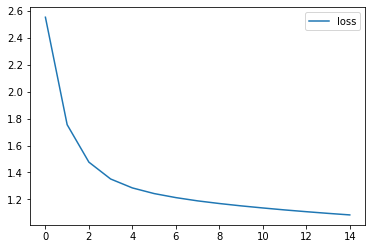

In [ ]:
model_df = pd.DataFrame(model_history.history)
model_df.plot()

### Create a model to have user_defind batch size

In [64]:
from tensorflow.keras.models import load_model

model = create_model(vocab_size, embed_dim, rnn_neurons, batch_size = 1)
model.load_weights("/content/text_generation.h5")
model.build(tf.TensorShape([1, None]))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 64)             5376      
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1026)           3361176   
_________________________________________________________________
dense_1 (Dense)              (1, None, 84)             86268     
Total params: 3,452,820
Trainable params: 3,452,820
Non-trainable params: 0
_________________________________________________________________


**The prediction loop**

The following code block generates the text:
Begin by choosing a start string, initializing the RNN state and setting the number of characters to generate.  

Get the prediction distribution of the next character using the start string and the RNN state.  

Then, use a categorical distribution to calculate the index of the predicted character. Use this predicted character as our next input to the model.  

The RNN state returned by the model is fed back into the model so that it now has more context, instead of only one character. After predicting the next character, the modified RNN states are again fed back into the model, which is how it learns as it gets more context from the previously predicted characters.  

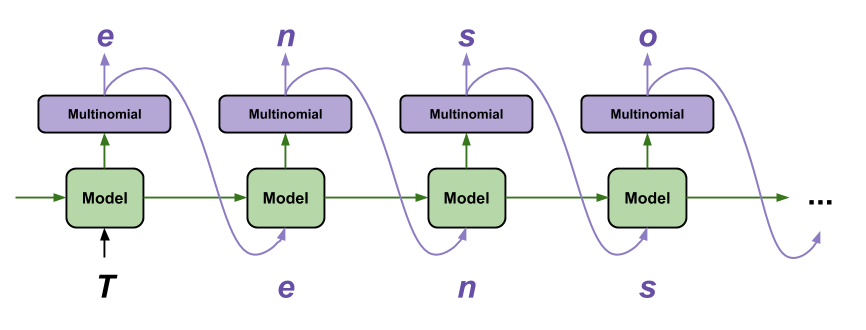

In [81]:
def generate_text(model, start_seed, gen_size = 100, temp = 1.0):
  '''
  model: Trained Model to Generate Text
  start_seed: Intial Seed text in string form
  gen_size: Number of characters to generate

  Basic idea behind this function is to take in some seed text, format it so
  that it is in the correct shape for our network, then loop the sequence as
  we keep adding our own predicted characters. Similar to our work in the RNN
  time series problems.
  '''

  # Number of characters to generate
  num_generate = gen_size

  # Encoding starting seed text
  input_eval = [char_to_ind[s] for s in start_seed]

  # Expand to match batch format shape
  input_eval = tf.expand_dims(input_eval, 0)
  # print(input_eval.shape)
  # Empty list to hold resulting generated text
  text_generated = []

  # Temperature effects randomness in our resulting text
  # The term is derived from entropy/thermodynamics.
  # The temperature is used to effect probability of next characters.
  # Higher probability == lesss surprising/ more expected
  # Lower temperature == more surprising / less expected

  temperature = temp

  #Batch_size == 1
  model.reset_states()

  for i in range(num_generate):

    # Generate Predictions
    predictions = model(input_eval)
    #print("predictions_shape:", predictions.shape)    #Initially Shape: (1,6,84), then (1,1,84)

    # Remove the batch shape dimension
    predictions = tf.squeeze(predictions, 0)           #Initially Shape: (6,84), then (1,84)
    
    
    # Use a cateogircal disitribution to select the next character
    predictions = predictions/temperature
    predicted_id = tf.random.categorical(predictions, num_samples = 1)[-1,0].numpy()

    print(predicted_id)
    print("before input_eval")
    print(input_eval)
    input_eval = tf.expand_dims([predicted_id], 0 )
    print("After input eval")
    print(input_eval)

    text_generated.append(ind_to_char[predicted_id])

  return (start_seed + "".join(text_generated))

In [84]:
print(generate_text(model, "JULIET", gen_size = 100))

33
before input_eval
tf.Tensor([[35 46 37 34 30 45]], shape=(1, 6), dtype=int32)
After input eval
tf.Tensor([[33]], shape=(1, 1), dtype=int32)
10
before input_eval
tf.Tensor([[33]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[10]], shape=(1, 1), dtype=int32)
1
before input_eval
tf.Tensor([[10]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[1]], shape=(1, 1), dtype=int32)
44
before input_eval
tf.Tensor([[1]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[44]], shape=(1, 1), dtype=int32)
63
before input_eval
tf.Tensor([[44]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[63]], shape=(1, 1), dtype=int32)
60
before input_eval
tf.Tensor([[63]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[60]], shape=(1, 1), dtype=int32)
1
before input_eval
tf.Tensor([[60]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[1]], shape=(1, 1), dtype=int32)
63
before input_eval
tf.Tensor([[1]], shape=(1, 1), dtype=int32)
After input eval
tf.Tensor([[